In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#state wise data set
df1 = pd.read_csv('crime_by_state_rt.csv')

In [3]:
df =df1.set_index('Year')

In [6]:
df.head(5)

,STATE/UT,Murder,Assault on women,Kidnapping and Abduction,Dacoity,Robbery,Arson,Hurt,Prevention of atrocities (POA) Act,Protection of Civil Rights (PCR) Act,Other Crimes Against SCs
Year,,,,,,,,,,,
2001,ANDHRA PRADESH,45,69,22,3,2,6,518,950,312,1006
2002,ANDHRA PRADESH,60,98,18,0,4,12,568,830,459,1336
2003,ANDHRA PRADESH,33,79,27,1,15,4,615,1234,165,1386
2004,ANDHRA PRADESH,39,66,28,0,7,20,474,1319,68,1234
2005,ANDHRA PRADESH,37,74,21,0,0,9,459,1244,61,1212


In [7]:
df['STATE/UT'].nunique()

35

In [8]:
df.isnull().any()

#no NUll and missing values in dataset

STATE/UT                                False
Murder                                  False
Assault on women                        False
Kidnapping and Abduction                False
Dacoity                                 False
Robbery                                 False
Arson                                   False
Hurt                                    False
Prevention of atrocities (POA) Act      False
Protection of Civil Rights (PCR) Act    False
Other Crimes Against SCs                False
dtype: bool

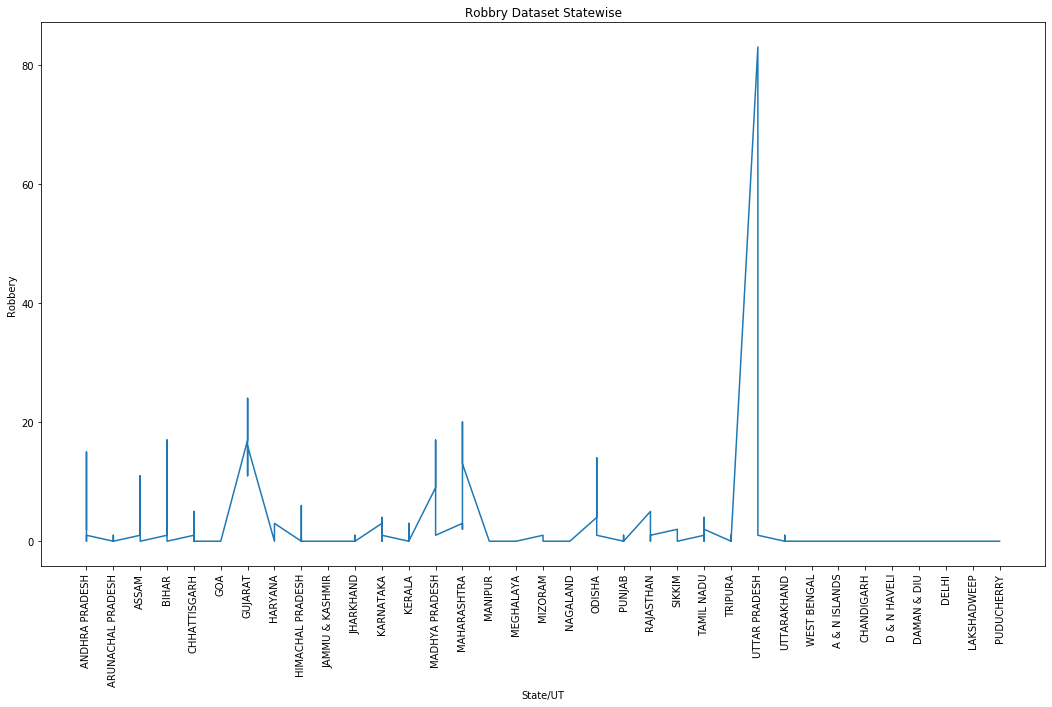

In [9]:
plt.figure(figsize=(18,10))
plt.plot(df['STATE/UT'],df['Robbery'])
plt.xticks(rotation=90)
plt.xlabel('State/UT')
plt.ylabel('Robbery')
plt.title('Robbry Dataset Statewise')
plt.savefig('Robery Data By Statewise')
plt.show()

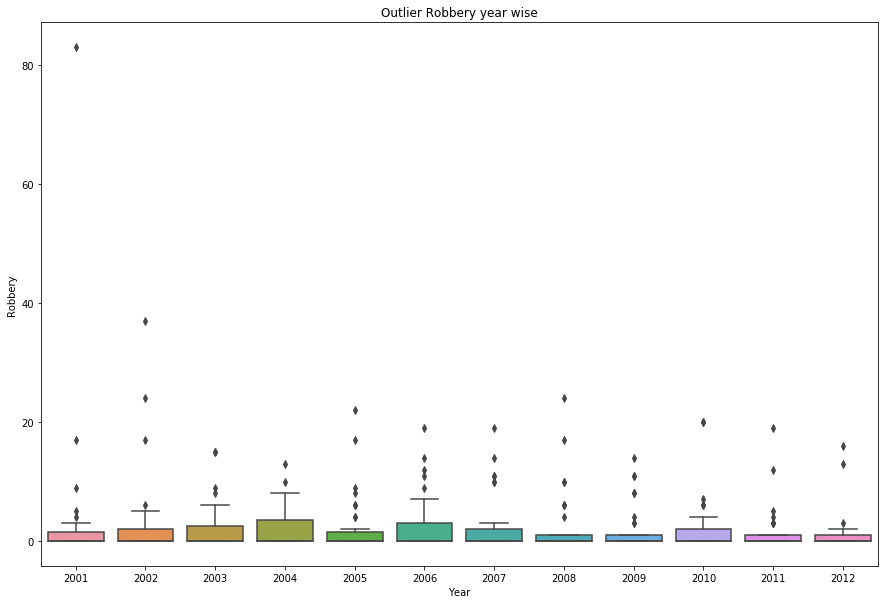

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="Year", y="Robbery", data=df1).set_title('Outlier Robbery year wise')
plt.show()
plt.savefig('Outlier Robbery Detection')

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x ='STATE/UT', y ='Robbery', data =df).set_title('Outlier Robbery State-Wise')
plt.xticks(rotation=90)
plt.savefig('Outlier Robbery Statewise')

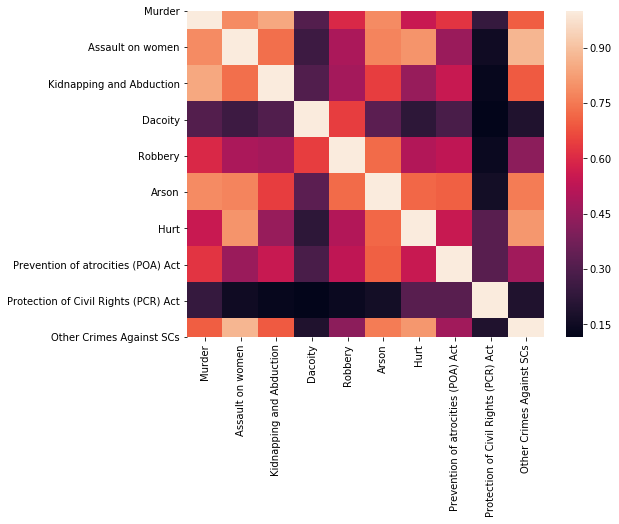

In [11]:
plt.figure(figsize=(8,6))
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.savefig('corelation Graph')

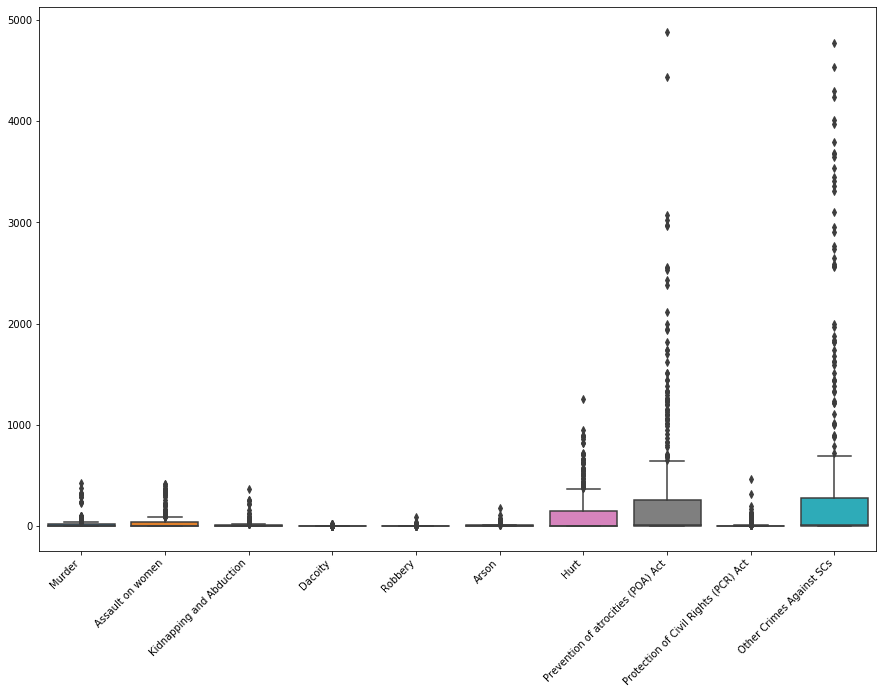

In [12]:
plt.figure(figsize=(15,10))
ax =sns.boxplot(data=df)
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)

In [13]:
#state wise data set
df = pd.read_csv('crime_by_state_rt.csv', index_col ='STATE/UT')
df_up = df.loc['UTTAR PRADESH']

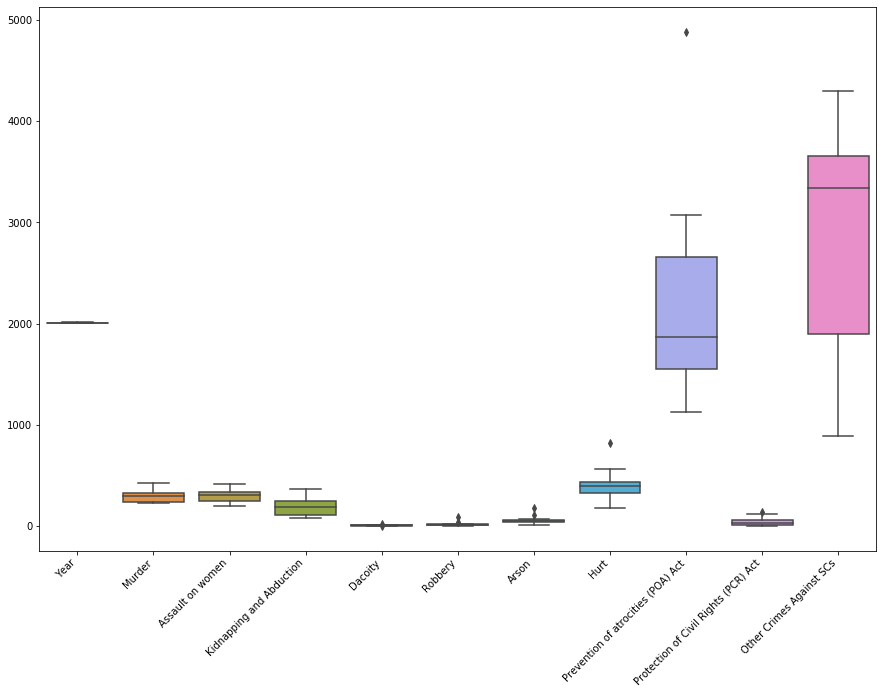

In [14]:
plt.figure(figsize=(15,10))
ax =sns.boxplot(data=df_up)
for label in ax.get_xticklabels():
    label.set_ha("right")
    label.set_rotation(45)